In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [383]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [384]:
df = pd.read_sql_query("""
SELECT primary_title, runtime_minutes, genres, averagerating, 
numvotes, ordering, category, job, characters, id, release_date, 
production_budget, domestic_gross, worldwide_gross, primary_name
FROM imdb_title_basics ba
JOIN imdb_title_ratings r ON ba.tconst = r.tconst
JOIN imdb_title_principals p ON p.tconst = ba.tconst
JOIN imdb_name_basics na ON na.nconst = p.nconst
LEFT JOIN movies.tn_movie_budgets bud ON bud.movie = ba.primary_title
""", con)

In [385]:
df.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,10,composer,,,NaN,None,None,None,None,Naushad
1,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,1,actor,,"[""Kundan S. Prasad"",""Bajrangi""]",NaN,None,None,None,None,Dilip Kumar
2,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,2,actress,,"[""Munni"",""Laila-E-Aasmaan""]",NaN,None,None,None,None,Vyjayanthimala
3,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,3,actor,,"[""Ganeshi N. Prasad""]",NaN,None,None,None,None,Balraj Sahni
4,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,4,actor,,"[""Dwarka N. Prasad""]",NaN,None,None,None,None,Sanjeev Kumar


In [386]:
def get_genres(df, genre):
    revenue_list = []
    profit_list = []
    for i in range(len(df)):
        if genre in df['genres3'].iloc[i]:
            revenue_list.append(df['worldwide_gross_2'].iloc[i])
            profit_list.append(df['profit_multiple'].iloc[i])
    avg_revenue = sum(revenue_list)/len(revenue_list)
    avg_profit = sum(profit_list)/len(profit_list)
    return avg_revenue, avg_profit
df['genres3'] = list(df['genres'].str.split(','))

In [387]:
df['release_date'] = pd.to_datetime(df['release_date'])
import datetime
df['year'], df['month'] = df['release_date'].apply(lambda x: x.year), df['release_date'].apply(lambda x: x.month)
df.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month
0,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,10,composer,,,NaN,NaT,None,None,None,Naushad,"[Action, Crime, Drama]",NaN,NaN
1,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,1,actor,,"[""Kundan S. Prasad"",""Bajrangi""]",NaN,NaT,None,None,None,Dilip Kumar,"[Action, Crime, Drama]",NaN,NaN
2,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,2,actress,,"[""Munni"",""Laila-E-Aasmaan""]",NaN,NaT,None,None,None,Vyjayanthimala,"[Action, Crime, Drama]",NaN,NaN
3,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,3,actor,,"[""Ganeshi N. Prasad""]",NaN,NaT,None,None,None,Balraj Sahni,"[Action, Crime, Drama]",NaN,NaN
4,Sunghursh,175.0,"Action,Crime,Drama",7.0,77,4,actor,,"[""Dwarka N. Prasad""]",NaN,NaT,None,None,None,Sanjeev Kumar,"[Action, Crime, Drama]",NaN,NaN


In [388]:
df_econ = df.dropna(subset = ['production_budget', 'domestic_gross', 'worldwide_gross'])

In [389]:
df_econ['production_budget'] = df_econ['production_budget'].str.replace('$','').str.replace(',','')
df_econ['domestic_gross'] = df_econ['domestic_gross'].str.replace('$','').str.replace(',','')
df_econ['worldwide_gross'] = df_econ['worldwide_gross'].str.replace('$','').str.replace(',','')

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [390]:
df_econ['production_budget'] = df_econ['production_budget'].astype(float)
df_econ['domestic_gross'] = df_econ['domestic_gross'].astype(float)
df_econ['worldwide_gross'] = df_econ['worldwide_gross'].astype(float)

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [391]:
df_econ.head()

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,"[Action, Animation, Comedy]",2012.0,12.0
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,"[Action, Animation, Comedy]",2012.0,12.0
135,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2,actress,,"[""Sweetcakes""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Haylie Duff,"[Action, Animation, Comedy]",2012.0,12.0
136,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,3,actor,,"[""Dex Dogtective""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Charlie Sheen,"[Action, Animation, Comedy]",2012.0,12.0
137,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,4,actress,,"[""Lady X""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Eva Longoria,"[Action, Animation, Comedy]",2012.0,12.0


In [392]:
df_econ['profit_multiple'] = (df_econ.worldwide_gross - df_econ.production_budget) / df_econ.production_budget

C:\Users\crisp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [393]:
df_econ.head(20)

,primary_title,runtime_minutes,genres,averagerating,numvotes,ordering,category,job,characters,id,release_date,production_budget,domestic_gross,worldwide_gross,primary_name,genres3,year,month,profit_multiple
133,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,10,producer,producer,,26.0,2012-12-31,45000000.0,0.0,73706.0,Robert Engelman,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
134,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,1,actress,,"[""Sunshine Goodness""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Hilary Duff,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
135,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,2,actress,,"[""Sweetcakes""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Haylie Duff,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
136,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,3,actor,,"[""Dex Dogtective""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Charlie Sheen,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
137,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,4,actress,,"[""Lady X""]",26.0,2012-12-31,45000000.0,0.0,73706.0,Eva Longoria,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
138,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,5,director,,,26.0,2012-12-31,45000000.0,0.0,73706.0,Lawrence Kasanoff,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
139,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,6,writer,story,,26.0,2012-12-31,45000000.0,0.0,73706.0,Joshua Wexler,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
140,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,7,writer,screenplay,,26.0,2012-12-31,45000000.0,0.0,73706.0,Brent V. Friedman,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
141,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,8,writer,screenplay,,26.0,2012-12-31,45000000.0,0.0,73706.0,Rebecca Swanson,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362
142,Foodfight!,91.0,"Action,Animation,Comedy",1.9,8248,9,writer,screenplay,,26.0,2012-12-31,45000000.0,0.0,73706.0,Sean Catherine Derek,"[Action, Animation, Comedy]",2012.0,12.0,-0.998362


In [394]:
df_econ = df_econ[df_econ.groupby('primary_name').primary_name.transform(len)>2]

In [395]:
df_writers = df_econ.loc[df_econ['category']== 'writer']
df_directors = df_econ.loc[df_econ['category']== 'director']

In [396]:
df_writers.groupby(['primary_name','genres'])['profit_multiple'].mean().nlargest(30)

primary_name        genres                    
Danny McBride       Horror,Thriller               81.014103
Debra Hill          Horror,Thriller               81.014103
Jeff Fradley        Horror,Thriller               81.014103
John Carpenter      Horror,Thriller               81.014103
Leigh Whannell      Horror,Mystery,Thriller       65.580591
Christopher Landon  Horror                        58.170677
Oren Peli           Horror                        58.170677
Charles Perrault    Drama,Family,Fantasy          47.260224
Chris Weitz         Drama,Family,Fantasy          47.260224
Christopher Landon  Horror,Mystery,Thriller       33.985784
Oren Peli           Horror,Mystery,Thriller       31.641065
Adam Rex            Adventure,Animation,Comedy    29.851850
Jeff Lam            Drama,Horror,Thriller         29.851850
Matt Ember          Adventure,Animation,Comedy    29.851850
Nico Leunen         Drama                         29.851850
Tom J. Astle        Adventure,Animation,Comedy    29.

In [397]:
director_chart = df_directors.groupby(['primary_name', 'genres'])['profit_multiple'].mean().nlargest(30)

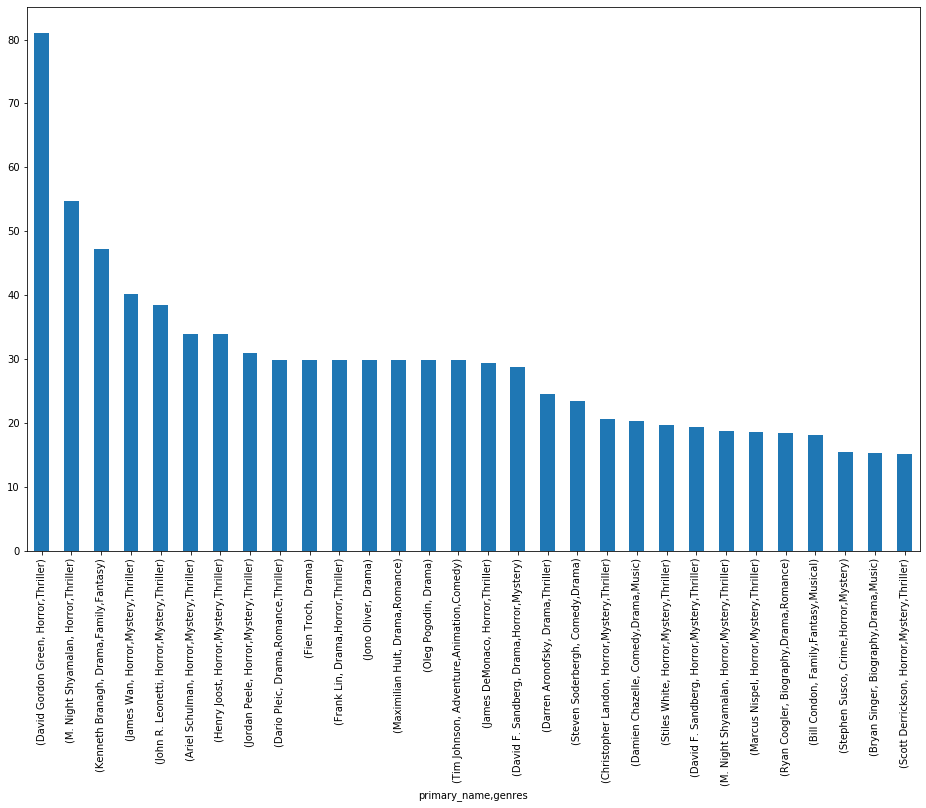

In [398]:
director_chart.plot.bar(figsize=(16,10))
plt.show()

In [401]:
df_actors = df_econ.loc[(df_econ['category']== 'actor') | (df_econ['category']=='actress')]
df_actors.groupby(['primary_name','genres'])['worldwide_gross'].mean().nlargest(10)

primary_name         genres                    
Chris Hemsworth      Action,Adventure,Sci-Fi       1.725574e+09
Mark Ruffalo         Action,Adventure,Sci-Fi       1.725574e+09
Judy Greer           Action,Adventure,Sci-Fi       1.648855e+09
Bryce Dallas Howard  Action,Adventure,Sci-Fi       1.477314e+09
Chris Pratt          Action,Adventure,Sci-Fi       1.477314e+09
Chadwick Boseman     Action,Adventure,Sci-Fi       1.348258e+09
Lupita Nyong'o       Action,Adventure,Sci-Fi       1.348258e+09
Michael B. Jordan    Action,Adventure,Sci-Fi       1.348258e+09
Josh Gad             Adventure,Animation,Comedy    1.272470e+09
Kristen Bell         Adventure,Animation,Comedy    1.272470e+09
Name: worldwide_gross, dtype: float64

In [400]:
df_econ.groupby(['primary_name', 'category']).mean().sort_values(by='profit_multiple', ascending=False)

,,runtime_minutes,averagerating,numvotes,ordering,id,production_budget,domestic_gross,worldwide_gross,year,month,profit_multiple
primary_name,category,,,,,,,,,,,
Guymon Casady,producer,101.0,5.900000,65032.666667,8.0,71.666667,2.003333e+07,3.468903e+07,7.010693e+07,2014.0,8.333333,139.728961
Kayla Elizabeth,actress,80.0,4.166667,207.000000,2.0,49.666667,1.643800e+07,1.330954e+07,4.930954e+07,1984.0,10.333333,88.266662
James Jude Courtney,actor,106.0,6.600000,88395.000000,4.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
Andi Matichak,actress,106.0,6.600000,88395.000000,3.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
Jeff Fradley,writer,106.0,6.600000,88395.000000,8.0,29.333333,8.441667e+06,8.820372e+07,1.341384e+08,2001.0,9.333333,81.014103
...,...,...,...,...,...,...,...,...,...,...,...,...
Chris Morgan,producer,124.0,6.600000,218063.000000,9.0,17.000000,1.980000e+07,0.000000e+00,0.000000e+00,2018.0,12.000000,-1.000000
Patrick Wilson,producer,82.0,5.400000,5164.000000,7.0,93.000000,5.000000e+06,0.000000e+00,0.000000e+00,2015.0,1.000000,-1.000000
James Remar,actor,89.5,4.575000,1690.750000,2.0,73.750000,1.830000e+06,0.000000e+00,0.000000e+00,2015.0,5.250000,-1.000000
